### Total COVID-19 tests per 1,000 people & per case
refer:[ourworldindata](https://ourworldindata.org/grapher/full-list-cumulative-total-tests-per-thousand)
[ourworldindata](https://ourworldindata.org/coronavirus-testing)

In [1]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from tabulate import tabulate
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/DS_Final_pro/'
df = pd.read_csv(DATA_DIR + 'covid19_tests_perthousand.csv')
df2 = pd.read_csv(DATA_DIR + 'tests_per_confirmed_case.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = df.rename(columns={'Total tests per thousand':'tpt'})
df = df.drop('Code',axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df2 = df2.rename(columns={'Tests per confirmed case':'tpc'})
df2 = df2.drop('Code',axis = 1)
df2['Date'] = pd.to_datetime(df2['Date'])

In [4]:
df_all = df.groupby(['Date']).mean().reset_index()
temp = df_all.melt(id_vars='Date', value_vars=['tpt'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Global test_per_1000 Report',
              color_discrete_sequence=['#1a780d'])
fig.show()

In [5]:
df2_all = df2.groupby(['Date']).mean().reset_index()
temp = df2_all.melt(id_vars='Date', value_vars=['tpc'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Global test_per_case Report',
              color_discrete_sequence=['#1a780d'])
fig.show()

In [6]:
df_country = df.groupby(['Entity','Date']).mean().reset_index()
df2_country = df2.groupby(['Entity','Date']).mean().reset_index()

In [7]:
df_country[df_country['Date'] == max(df['Date']) - datetime.timedelta(days=3)].sort_values('tpt', ascending=False).head(20)

,Entity,Date,tpt
327,Bahrain,2020-06-12,236.859
2361,Iceland,2020-06-12,184.859
3546,Luxembourg,2020-06-12,162.749
1538,Denmark,2020-06-12,134.839
3476,Lithuania,2020-06-12,130.795
5268,Russia,2020-06-12,97.432
5076,Qatar,2020-06-12,97.417
3289,Kuwait,2020-06-12,77.303
2867,Italy,2020-06-12,74.666
1800,Estonia,2020-06-12,71.898


In [8]:
df2_country[df2_country['Date'] == max(df2['Date']) - datetime.timedelta(days=1)].sort_values('tpc', ascending=False).head(10)

,Entity,Date,tpc
4468,New Zealand,2020-06-16,8858.500
6718,"Thailand, people tested",2020-06-16,2069.375
7364,Uruguay,2020-06-16,1610.000
3636,Latvia,2020-06-16,1087.333
3799,Luxembourg,2020-06-16,873.688
3728,Lithuania,2020-06-16,556.038
6569,Taiwan,2020-06-16,472.500
6014,Slovenia,2020-06-16,389.455
2270,Greece,2020-06-16,329.165
1529,Denmark,2020-06-16,328.671


In [9]:
df2_country[df2_country['Date'] == max(df2['Date']) - datetime.timedelta(days=5)].sort_values('tpc', ascending=False).head(10)

,Entity,Date,tpc
139,Australia,2020-06-12,3696.778
6714,"Thailand, people tested",2020-06-12,1618.217
3632,Latvia,2020-06-12,766.500
3795,Luxembourg,2020-06-12,728.280
1226,Croatia,2020-06-12,728.000
5919,Slovakia,2020-06-12,609.000
4224,Myanmar,2020-06-12,491.120
6010,Slovenia,2020-06-12,469.000
3724,Lithuania,2020-06-12,458.015
1525,Denmark,2020-06-12,412.969


In [10]:
countryname = ['Denmark','Taiwan','United States, units unclear', 'Germany', 'Australia', 'Italy','Japan','Russia','South Korea'\
               ,  'United Kingdom','New Zealand','Belgium','Iceland','Switzerland','Qatar','Mexico']
df_plot = pd.DataFrame(columns=['Entity', 'Date', 'tpt'])
df2_plot = pd.DataFrame(columns=['Entity', 'Date', 'tpc'])
for i in countryname:
  print(i,len(df_country[df_country['Entity'] == i]))
  print(i,len(df2_country[df2_country['Entity'] == i]))
  df_plot = pd.concat([df_plot, df_country[df_country['Entity'] == i].reset_index()], axis=0, ignore_index=True)
  df2_plot = pd.concat([df2_plot, df2_country[df2_country['Entity'] == i].reset_index()], axis=0, ignore_index=True)

Denmark 126
Denmark 111
Taiwan 93
Taiwan 81
United States, units unclear 100
United States, units unclear 95
Germany 14
Germany 85
Australia 74
Australia 79
Italy 112
Italy 107
Japan 122
Japan 121
Russia 100
Russia 98
South Korea 140
South Korea 142
United Kingdom 50
United Kingdom 45
New Zealand 97
New Zealand 75
Belgium 105
Belgium 100
Iceland 108
Iceland 103
Switzerland 140
Switzerland 112
Qatar 87
Qatar 88
Mexico 162
Mexico 104


In [11]:
fig = px.line(df_plot, x="Date", y="tpt", color='Entity',
              title='COVID-19 tests per 1000')
fig.update_layout(legend=dict(xanchor="left", yanchor="top"),
                  margin=dict(t=80,l=0,r=0,b=0))
fig.show()    

In [12]:
fig = px.line(df2_plot, x="Date", y="tpc", color='Entity',
              title='COVID-19 tests per 1000')
fig.update_layout(legend=dict(xanchor="left", yanchor="top"),
                  margin=dict(t=80,l=0,r=0,b=0))
fig.show() 

* 大範圍檢測 vs 精準篩檢
1. tpt high , tpc high
2. tpt low , tpc high
3. note:Euro tpt high ,tpc low (篩檢遠不及散播)
 

In [13]:
url = 'https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/covid_19_clean_complete.csv'
df_covid = pd.read_csv(url, parse_dates=['Date'])

df_covid['Deaths_rate'] = df_covid.apply(lambda x: x['Confirmed'] if x['Confirmed'] == 0 else x['Deaths']/x['Confirmed'], axis=1)
df_covid['Recovered_rate'] = df_covid.apply(lambda x: x['Confirmed'] if x['Confirmed'] == 0 else x['Recovered']/x['Confirmed'], axis=1)
df_covid = df_covid.groupby(['Date', 'Country/Region'])['Active','Deaths_rate',	'Recovered_rate'].max().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



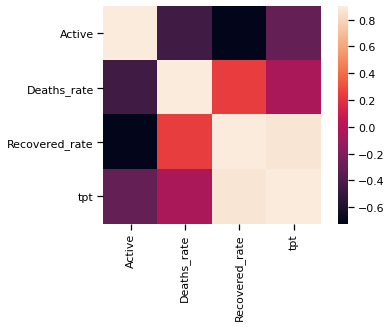

In [14]:
temp1 = df_covid[df_covid['Country/Region'] == 'Taiwan*'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'Taiwan'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'Taiwan'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
#temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

* 檢測和active(-),Deaths_rate(+),Recovered_rate(+)

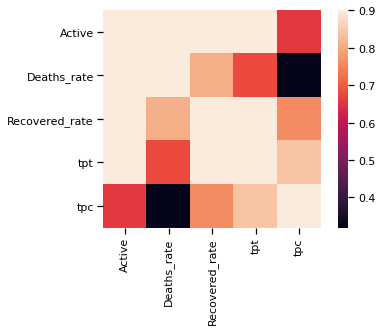

In [17]:
temp1 = df_covid[df_covid['Country/Region'] == 'US'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'United States, units unclear'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'United States, units unclear'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

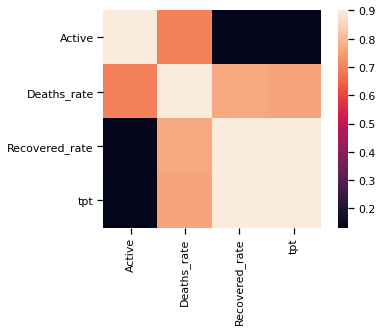

In [18]:
temp1 = df_covid[df_covid['Country/Region'] == 'Italy'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'Italy'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'Italy'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
#temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

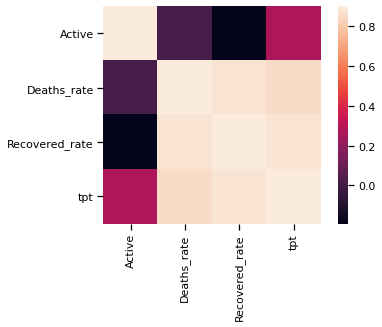

In [19]:
temp1 = df_covid[df_covid['Country/Region'] == 'Japan'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'Japan'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'Japan'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
#temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

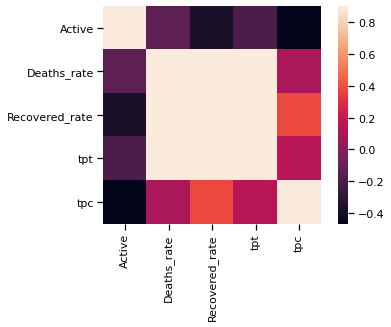

In [27]:
temp1 = df_covid[df_covid['Country/Region'] == 'South Korea'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'South Korea'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'South Korea'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

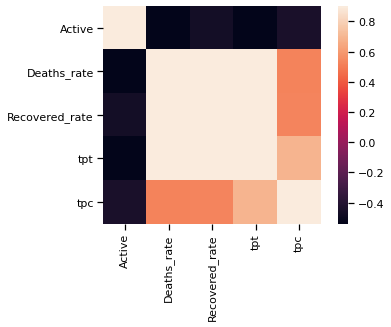

In [26]:
temp1 = df_covid[df_covid['Country/Region'] == 'New Zealand'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'New Zealand'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'New Zealand'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

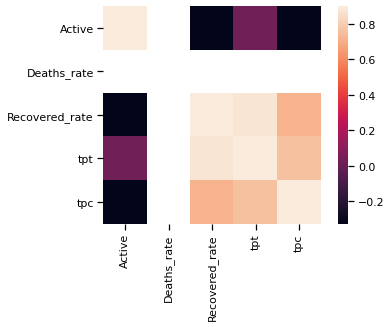

In [30]:
temp1 = df_covid[df_covid['Country/Region'] == 'Vietnam'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'Vietnam'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'Vietnam'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

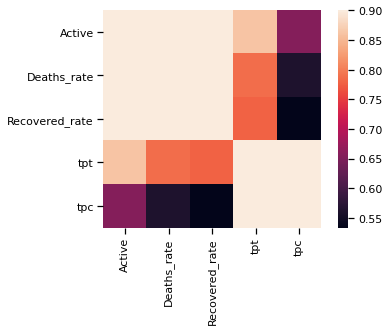

In [31]:
temp1 = df_covid[df_covid['Country/Region'] == 'Belgium'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'Belgium'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'Belgium'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

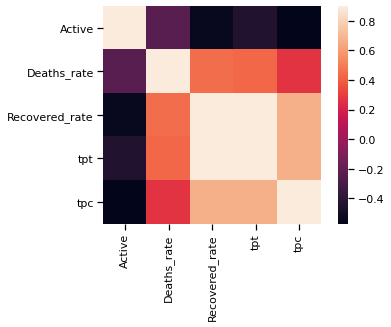

In [32]:
temp1 = df_covid[df_covid['Country/Region'] == 'Iceland'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'Iceland'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'Iceland'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

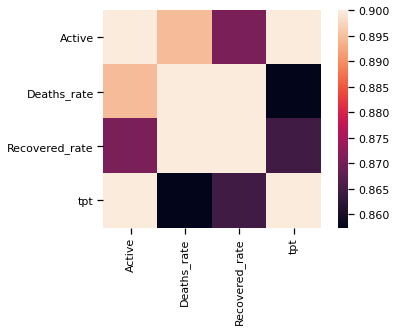

In [33]:
temp1 = df_covid[df_covid['Country/Region'] == 'Mexico'].set_index('Date')
temp2 = df_country[df_country['Entity'] == 'Mexico'].set_index('Date')['tpt']
temp3 = df2_country[df2_country['Entity'] == 'Mexico'].set_index('Date')['tpc']
temp1 = temp1.join(temp2,how='inner')
#temp1 = temp1.join(temp3,how='inner')

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp1 = temp1.drop(['Country/Region'],axis = 1)
corrmat = temp1.corr()
sns.heatmap(corrmat, vmax = .9, square = True)